In [0]:
from keras.datasets import imdb
import numpy as np


Using TensorFlow backend.


In [0]:
# save np.load
np_load_old = np.load
#Modify the default parameters of np.load
np.load = lambda*a,**k:np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#restore np.load for future normal usage
np.load = np_load_old

In [0]:
# no word index exceeds 10,000 (because of num_words=10000)
max([max(sequence) for sequence in train_data])

9999

In [0]:
# Decode one of the reviews back to english
## indicces are offset by 3 because 0,1 and 2 are reserved for: "padding". "start of sequence" and "unknown"
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
## Preparing the data
# Encoding the integer sequence into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
#train_data.dim()

AttributeError: ignored

In [0]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
type(y_test)

numpy.ndarray

In [0]:
## Building the Network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0801 17:55:09.634693 139807378007936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 17:55:09.680076 139807378007936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 17:55:09.688231 139807378007936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
## Compiling the model
# Using standard optimizer. loss_function and metrics available in keras
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W0801 17:55:17.534310 139807378007936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 17:55:17.562897 139807378007936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0801 17:55:17.570508 139807378007936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
## Configuring the optimizer
# Configure the parameters of the optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
## Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
## Validating the approach
## in order to monitor during training the accuracy of the model on data it has never seen before
# create a validation set by setting apart 10,000 samples from the training data
# setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [0]:
## Training the model
## train the model for 20 epochs(20 iterations over all samples in x_train and y_train tensors), in minibatches of 512 samples.
## at the same time, monitor loss and accuracy on the 10,000 samples set apart [by passing validation data as the validation_data argument].
# training the model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0801 17:55:31.905969 139807378007936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.5048 - acc: 0.7873 - val_loss: 0.3775 - val_acc: 0.8702
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.2991 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1747 - acc: 0.9439 - val_loss: 0.2826 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1422 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1147 - acc: 0.9653 - val_loss: 0.3144 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0977 - acc: 0.9707 - val_loss: 0.3131 - 

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

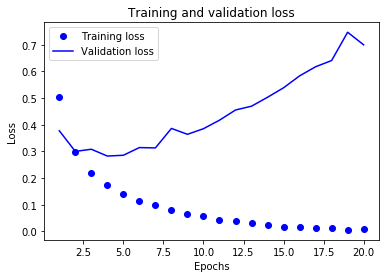

In [0]:
## Validating the model
# plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

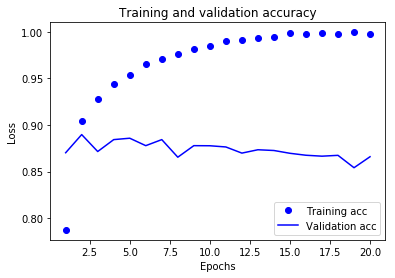

In [0]:
# plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label="Training acc")
plt.plot(epochs, val_acc_values, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
## training loss decreases with epochs and training accuracy increases. This is what we expect
## But, the validation loss doesn't act the same because of over-fitting (learning representations that are specific to training data) 
# re-training the model from scratch (with only 4 epochs, to avoid over-fitting)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.4790 - acc: 0.8263
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2795 - acc: 0.9073
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2107 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


In [0]:
## Using a trained network to generate predictions on new data

predictions = model.predict(x_test)

In [0]:
predicted = []
for i in range (0, len(predictions)):
  if (predictions[i] >= 0.5):
    predicted.append(1)
  else:
    predicted.append(0)

In [0]:
predicted

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


In [0]:
results

[0.3108429224872589, 0.87624]

In [0]:
######################### Further Experimentation###########################################################
# using three hidden layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history

history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.5264 - acc: 0.7711 - val_loss: 0.3953 - val_acc: 0.8580
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.3032 - acc: 0.9033 - val_loss: 0.3346 - val_acc: 0.8645
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2188 - acc: 0.9274 - val_loss: 0.3215 - val_acc: 0.8696
Epoch 4/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1716 - acc: 0.9434 - val_loss: 0.2767 - val_acc: 0.8888
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1370 - acc: 0.9558 - val_loss: 0.2930 - val_acc: 0.8845
Epoch 6/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1111 - acc: 0.9649 - val_loss: 0.3086 - val_acc: 0.8837
Epoch 7/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.0909 - acc: 0.9729 - val_loss: 0.3835 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

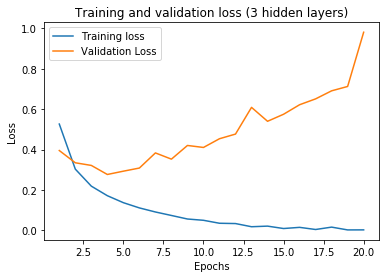

In [0]:
# to plot training loss and validation loss

import matplotlib.pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+1)
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training and validation loss (3 hidden layers)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

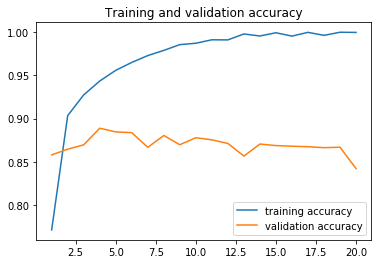

In [0]:
# to plot training and validation accuracy

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, label="training accuracy")
plt.plot(epochs, val_acc, label="validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()


In [0]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.4560 - acc: 0.8117
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2549 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.1954 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


In [0]:
## the accuracy has decreased with the addition of a third hidden layer
results

[0.2880235212612152, 0.88548]

In [0]:
model.predict(x_test)

array([[0.22361639],
       [0.99843717],
       [0.8820461 ],
       ...,
       [0.13047525],
       [0.07232568],
       [0.64773476]], dtype=float32)